In [1]:
from __future__ import print_function

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2

folder = 'figures'

import flotilla
study = flotilla.embark('singlecell_pnm_figure4_voyages', 
                        flotilla_dir='/projects/ps-yeolab/obotvinnik/flotilla_projects/')
# study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering')

/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/obotvinnik/workspace-git/flotilla/flotilla/__init__.py:65: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-12-08 13:32:05	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure4_voyages/datapackage.json
2016-12-08 13:32:05	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.
2016-12-08 13:32:40 	Initializing Study
2016-12-08 13:32:40 	Initializing Predictor configuration manager for Study
2016-12-08 13:32:40	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-12-08 13:32:40	Added ExtraTreesClassifier to default predictors
2016-12-08 13:32:40	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-12-08 13:32:40	Added ExtraTreesRegressor to default predictors
2016-12-08 13:32:40	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-12-08 13:32:40	Added GradientBoostingClassifier to defa

Error loading species hg19 data: HTTP Error 404: Not Found

In [11]:
outlier_colors = pd.Series(['lightgrey' if x else 'black' for x in motor_neurons_metadata['outlier']], 
                           index=motor_neurons_metadata.index)
outlier_colors[:5]

M1_01        black
M1_02        black
M1_03    lightgrey
M1_04    lightgrey
M1_05        black
dtype: object

In [12]:
single_metadata = study.metadata.data.query('(single == True)')
print(single_metadata.shape)
single_metadata.head()

(70, 18594)


,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,...,ENSGR0000185960,ENSGR0000197976,ENSGR0000198223,ENSGR0000205755,ENSGR0000214717,ENSGR0000223511,ENSGR0000226179,ENSGR0000236017,ENSGR0000236871,ENSGR0000270726
M1_01,0.000000,0,0.000000,0.476305,0.000000,0.000000,4.086611,0.000000,0.000000,6.805999,...,1.033579,0.000000,1.617492,0.443870,0.000000,0.154009,3.953973,0.000000,0.311817,0.082292
M1_02,6.507290,0,0.301184,2.747011,0.828363,1.171047,2.274019,6.534786,0.000000,1.697779,...,3.010307,0.000000,1.984850,1.118778,1.285161,1.246718,2.112323,0.000000,1.321778,0.000000
M1_03,8.520717,0,3.096142,2.255833,0.273850,5.306422,0.000000,0.000000,2.916491,0.441541,...,1.246802,2.717079,0.876316,0.559106,0.668499,0.550331,1.485530,0.183634,0.599407,0.267827
M1_04,4.099649,0,6.403888,3.715348,2.165648,0.000000,0.123868,0.336502,3.590614,0.000000,...,0.635299,6.343943,0.528861,0.000000,0.508210,0.000000,1.393207,0.000000,0.000000,0.000000
M1_05,0.225582,0,0.000000,1.210401,0.000000,0.000000,0.000000,0.000000,0.000000,2.950399,...,1.916381,0.000000,1.611869,0.517444,0.830031,0.409054,0.000000,0.105560,1.425287,0.000000


In [9]:
single_expression = study.expression.singles
print(single_expression.shape)
single_expression.head()

(206, 18594)


,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,...,ENSGR0000185960,ENSGR0000197976,ENSGR0000198223,ENSGR0000205755,ENSGR0000214717,ENSGR0000223511,ENSGR0000226179,ENSGR0000236017,ENSGR0000236871,ENSGR0000270726
CVN_01,9.583297,0.0,3.691144,0.000000,0.000000,2.748821,0.0,1.722466,0.0,0.000000,...,0.080647,0.291587,1.017003,0.080984,6.998972,0.153573,0.119524,0.663759,0.000000,2.905205
CVN_02,5.338678,0.0,0.000000,0.000000,0.113387,0.000000,0.0,0.503710,0.0,1.451580,...,0.495262,0.000000,0.568696,0.000000,0.000000,0.000000,0.116144,0.000000,0.087565,3.746504
CVN_03,0.146438,0.0,0.000000,1.262223,0.000000,0.000000,0.0,0.291712,0.0,0.000000,...,0.000000,0.000000,0.330164,0.263555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CVN_04,8.422662,0.0,2.593897,0.000000,0.000000,6.688600,0.0,8.181010,0.0,1.155126,...,0.562974,0.000000,0.223287,0.140263,0.195424,0.000000,1.601383,0.000000,0.205765,1.533982
CVN_05,7.531459,0.0,5.124018,0.262705,4.346173,0.397903,0.0,6.262296,0.0,0.614197,...,0.353069,0.000000,0.646603,0.260183,6.631383,0.000000,0.096939,0.166200,0.133075,0.553417


In [10]:
gene_filter = (single_expression > 1).sum() >= 30
gene_filter.sum()

14314

In [11]:
single_expression = single_expression.loc[:, gene_filter]
print(single_expression.shape)
single_expression.head()

(206, 14314)


,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,ENSG00000001497,...,ENSGR0000178605,ENSGR0000182378,ENSGR0000185960,ENSGR0000197976,ENSGR0000198223,ENSGR0000214717,ENSGR0000223511,ENSGR0000226179,ENSGR0000236871,ENSGR0000270726
CVN_01,9.583297,3.691144,0.000000,0.000000,2.748821,0.0,1.722466,0.0,0.000000,7.703080,...,3.29961,1.774580,0.080647,0.291587,1.017003,6.998972,0.153573,0.119524,0.000000,2.905205
CVN_02,5.338678,0.000000,0.000000,0.113387,0.000000,0.0,0.503710,0.0,1.451580,6.666089,...,0.00000,4.323377,0.495262,0.000000,0.568696,0.000000,0.000000,0.116144,0.087565,3.746504
CVN_03,0.146438,0.000000,1.262223,0.000000,0.000000,0.0,0.291712,0.0,0.000000,0.000000,...,0.00000,0.225987,0.000000,0.000000,0.330164,0.000000,0.000000,0.000000,0.000000,0.000000
CVN_04,8.422662,2.593897,0.000000,0.000000,6.688600,0.0,8.181010,0.0,1.155126,5.373481,...,0.00000,1.646223,0.562974,0.000000,0.223287,0.195424,0.000000,1.601383,0.205765,1.533982
CVN_05,7.531459,5.124018,0.262705,4.346173,0.397903,0.0,6.262296,0.0,0.614197,8.701198,...,0.00000,0.900241,0.353069,0.000000,0.646603,6.631383,0.000000,0.096939,0.133075,0.553417


In [12]:
splicing_events = (('BRD8-event1', 'exon:chr5:137495758-137495862:- exon:chr5:137495244-137495288:- exon:chr5:137492571-137492956:-'),
                   ('BRD8-event2', 'exon:chr5:137500009-137500102:- exon:chr5:137499776-137499822:- exon:chr5:137498819-137499033:-'),
                   ("DYNC1I2", 'exon:chr2:172563743-172563887:+ exon:chr2:172569277-172569336:+ exon:chr2:172571838-172571878:+'),
                   ('EIF5', 'exon:chr14:103800339-103800597:+ exon:chr14:103800726-103800934:+ exon:chr14:103801990-103802269:+'),
                   ('EIF6', 'exon:chr20:33871979-33872295:- exon:chr20:33868457-33868632:- exon:chr20:33867745-33867921:-'),
                   ("MDM4", 'exon:chr1:204501319-204501374:+ exon:chr1:204506558-204506625:+ exon:chr1:204507337-204507436:+'),
                   ("MEAF6", 'exon:chr1:37967405-37967597:- exon:chr1:37962308-37962337:- exon:chr1:37961475-37961519:-'),
                   ("RPN2", 'exon:chr20:35864983-35865112:+ exon:chr20:35866805-35866852:+ exon:chr20:35869706-35869820:+'),
                   ('SUGT1', 'exon:chr13:53233314-53233384:+ exon:chr13:53235610-53235705:+ exon:chr13:53236784-53236837:+'))

splicing_events = list(((x, '@'.join(y.split())) for x, y in splicing_events))
splicing_events

[('BRD8-event1',
  'exon:chr5:137495758-137495862:-@exon:chr5:137495244-137495288:-@exon:chr5:137492571-137492956:-'),
 ('BRD8-event2',
  'exon:chr5:137500009-137500102:-@exon:chr5:137499776-137499822:-@exon:chr5:137498819-137499033:-'),
 ('DYNC1I2',
  'exon:chr2:172563743-172563887:+@exon:chr2:172569277-172569336:+@exon:chr2:172571838-172571878:+'),
 ('EIF5',
  'exon:chr14:103800339-103800597:+@exon:chr14:103800726-103800934:+@exon:chr14:103801990-103802269:+'),
 ('EIF6',
  'exon:chr20:33871979-33872295:-@exon:chr20:33868457-33868632:-@exon:chr20:33867745-33867921:-'),
 ('MDM4',
  'exon:chr1:204501319-204501374:+@exon:chr1:204506558-204506625:+@exon:chr1:204507337-204507436:+'),
 ('MEAF6',
  'exon:chr1:37967405-37967597:-@exon:chr1:37962308-37962337:-@exon:chr1:37961475-37961519:-'),
 ('RPN2',
  'exon:chr20:35864983-35865112:+@exon:chr20:35866805-35866852:+@exon:chr20:35869706-35869820:+'),
 ('SUGT1',
  'exon:chr13:53233314-53233384:+@exon:chr13:53235610-53235705:+@exon:chr13:53236784

In [13]:

splicing_to_correlate = pd.DataFrame(dict((gene, study.splicing.singles[event_id].dropna()) 
                                          for gene, event_id in splicing_events))
print(splicing_to_correlate.shape)
splicing_to_correlate.head()

(196, 9)


,BRD8-event1,BRD8-event2,DYNC1I2,EIF5,EIF6,MDM4,MEAF6,RPN2,SUGT1
CVN_01,NaN,NaN,NaN,1.0,NaN,1.000000,0.0,0.350598,0.250000
CVN_02,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.000000,0.000000
CVN_03,1.0,1.0,NaN,1.0,1.0,NaN,0.0,0.000000,NaN
CVN_04,NaN,NaN,NaN,1.0,NaN,0.000000,0.0,0.213058,0.000000
CVN_05,NaN,NaN,NaN,1.0,0.0,0.692308,0.0,0.000000,0.292383


## Pearson correlation of splicing to gene expression

In [14]:
figure_folder = 'figures/012_background_correlations_track_examples'
! mkdir -p $figure_folder

### Permutation analysis for significant correlations

In [15]:
np.random.seed(int(1e6))
n_permuations = 1000

random_seeds = pd.Series(np.random.randint(low=0, high=1e6, size=n_permuations))
assert len(random_seeds.unique()) == n_permuations
random_seeds.head()

0    396722
1    854203
2    901350
3    320477
4    968248
dtype: int64

In [ ]:
%%time

dfs = []

for i, random_seed in random_seeds.iteritems():
    np.random.seed(random_seed)
    permuted = single_expression.apply(np.random.permutation)
    df = splicing_to_correlate.apply(lambda x: permuted.apply(lambda y: y.corr(x)))
    df['iteration'] = i
    dfs.append(df)
permuted_correlations = pd.concat(dfs, ignore_index=True)
# permuted_correlations['dataset'] = 'Permuted'
print(permuted_correlations.shape)
permuted_correlations.head()

In [35]:
column_renamer = {'level_0': 'Splicing Gene', 0:'Pearson R'}

In [36]:
permuted_correlations_tidy = permuted_correlations.unstack().reset_index()
permuted_correlations_tidy = permuted_correlations_tidy.rename(columns=column_renamer)
permuted_correlations_tidy['dataset'] = 'Permuted'
permuted_correlations_tidy.head()

,Splicing Gene,level_1,Pearson R,dataset
0,PKM,0,0.141416,Permuted
1,PKM,1,0.028138,Permuted
2,PKM,2,0.021426,Permuted
3,PKM,3,-0.049653,Permuted
4,PKM,4,0.008166,Permuted


In [37]:
splicing_expression_corr_tidy = splicing_expression_corr.unstack().reset_index()
splicing_expression_corr_tidy = splicing_expression_corr_tidy.rename(columns=column_renamer)
splicing_expression_corr_tidy['dataset'] = 'Actual'
splicing_expression_corr_tidy.head()

,Splicing Gene,level_1,Pearson R,dataset
0,PKM,ENSG00000000003,0.050616,Actual
1,PKM,ENSG00000000419,-0.121469,Actual
2,PKM,ENSG00000000457,0.057363,Actual
3,PKM,ENSG00000000460,0.047255,Actual
4,PKM,ENSG00000001036,-0.320053,Actual


In [38]:
correlations_tidy = pd.concat([permuted_correlations_tidy, splicing_expression_corr_tidy])
print(correlations_tidy.shape)
correlations_tidy.head()

(69884374, 4)


,Splicing Gene,level_1,Pearson R,dataset
0,PKM,0,0.141416,Permuted
1,PKM,1,0.028138,Permuted
2,PKM,2,0.021426,Permuted
3,PKM,3,-0.049653,Permuted
4,PKM,4,0.008166,Permuted


In [39]:
study.supplemental.splicing_expression_corr_with_permuted = correlations_tidy

In [40]:
study.save('singlecell_pnm_figure6_splicing_correlation_permuted', 
                        flotilla_dir='/projects/ps-yeolab/obotvinnik/flotilla_projects/')

Wrote datapackage to /projects/ps-yeolab/obotvinnik/flotilla_projects//singlecell_pnm_figure6_splicing_correlation_permuted/datapackage.json


/home/obotvinnik/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:939: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->['Splicing Gene', 'level_1', 'dataset']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [44]:
correlations_tidy.groupby('Splicing Gene')['Pearson R'].describe()

Splicing Gene       
PKM            count    17460375.000000
               mean            0.000049
               std             0.158169
               min            -0.729266
               25%            -0.111662
               50%             0.000984
               75%             0.112772
               max             0.755275
SMARCE1        count    17452790.000000
               mean           -0.000006
               std             0.164481
               min            -0.742000
               25%            -0.113513
               50%             0.005453
               75%             0.120841
               max             0.848731
SNAP25         count    17425560.000000
               mean           -0.000064
               std             0.179652
               min            -0.811896
               25%            -0.128985
               50%             0.001700
               75%             0.131751
               max             0.798068
iteration      coun

In [ ]:
# correlations_tidy.to_csv('{}/splicing_expression_correlation_with_permutation.csv'.format(figure_folder))

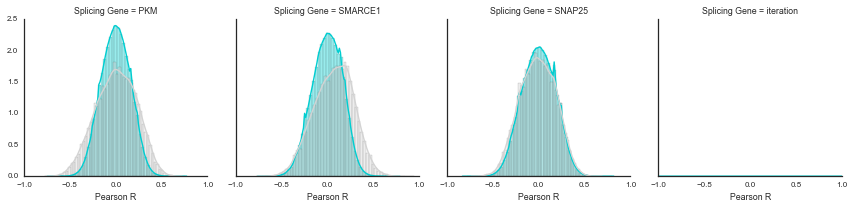

In [42]:
g = sns.FacetGrid(correlations_tidy, hue='dataset', col='Splicing Gene', palette=['DarkTurquoise', 'LightGrey'], 
                  hue_order=['Permuted', 'Actual'])
g.map(sns.distplot, 'Pearson R')
g.set(xlim=(-1, 1))
g.savefig('{}/pearson_correlation_distplot.pdf'.format(folder))

In [ ]:
# fig, ax = plt.subplots(figsize=(3, 2))
# sns.violinplot(x='Splicing Gene', y='Pearson R', data=correlations_tidy, hue='dataset', 
#                palette=['DarkTurquoise', 'lightGrey'], order=splicing_events.keys(),
#                hue_order=['Actual', 'Permuted'], cut=True)
# sns.despine()
# fig.savefig('{}/pearson_correlation_violinplots.pdf'.format(folder))

In [ ]:
# g = sns.FacetGrid(correlations_tidy, col='Splicing Gene', hue='dataset',
#                   palette=['DarkTurquoise', 'lightGrey'], hue_order=['Actual', 'Permuted'])
# g.map(sns.distplot, 'Pearson R')

In [67]:
splicing_expression_corr_filtered = splicing_expression_corr[splicing_expression_corr.abs() > 0.5].dropna(how='all')
print(splicing_expression_corr_filtered.shape)
splicing_expression_corr_filtered.head()

(542, 3)


,PKM,SMARCE1,SNAP25
ENSG00000003056,NaN,0.516013,NaN
ENSG00000004399,-0.528088,NaN,NaN
ENSG00000004838,NaN,NaN,0.503563
ENSG00000006327,-0.520701,NaN,NaN
ENSG00000006625,-0.527317,NaN,NaN


In [68]:
import matplotlib as mpl

In [69]:
cmap = mpl.cm.RdYlBu_r

In [70]:
cmap

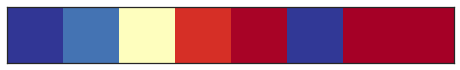

In [71]:
values = 0, 0.1, 0.5, 0.9, 0.99, 1, 1.0, 1.1
sns.palplot([cmap(v) for v in values])

In [72]:
cmap(1.1)

(0.64705884456634521, 0.0, 0.14901961386203766, 1.0)

In [73]:
cmap(1.0)

(0.64705884456634521, 0.0, 0.14901961386203766, 1.0)

In [74]:
! mkdir $folder

mkdir: cannot create directory `figures': File exists


(230, 41)
(268, 38)
(66, 32)


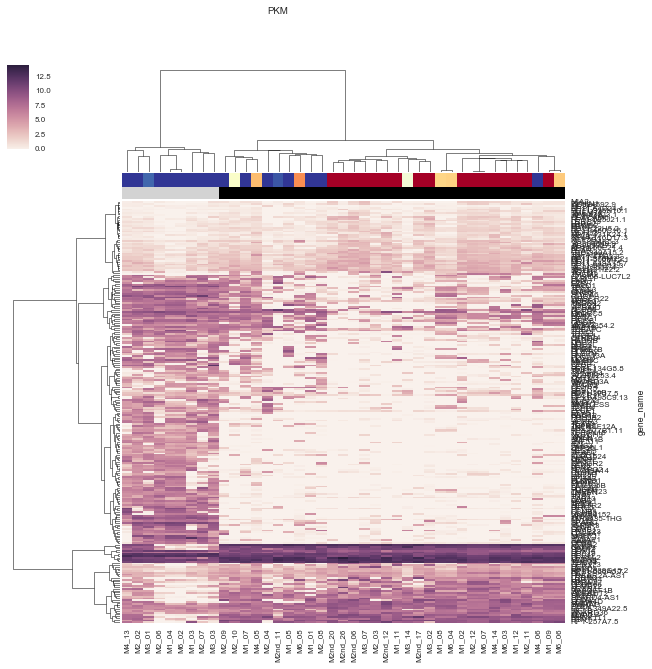

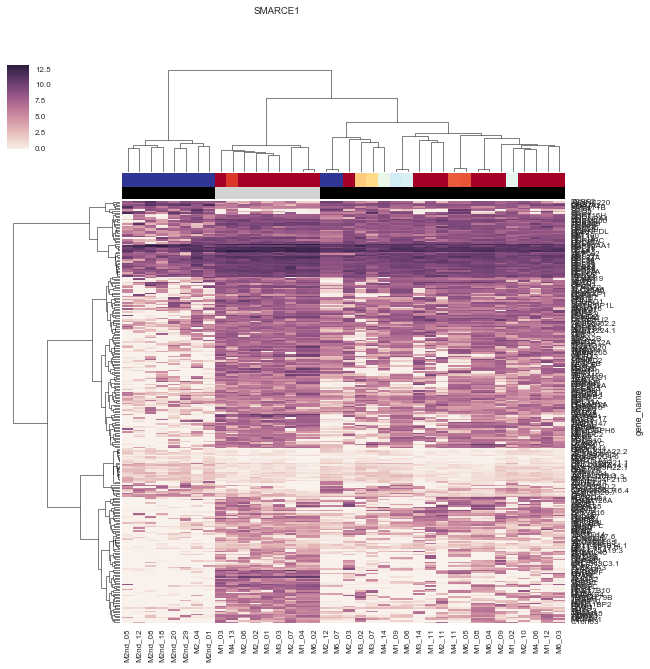

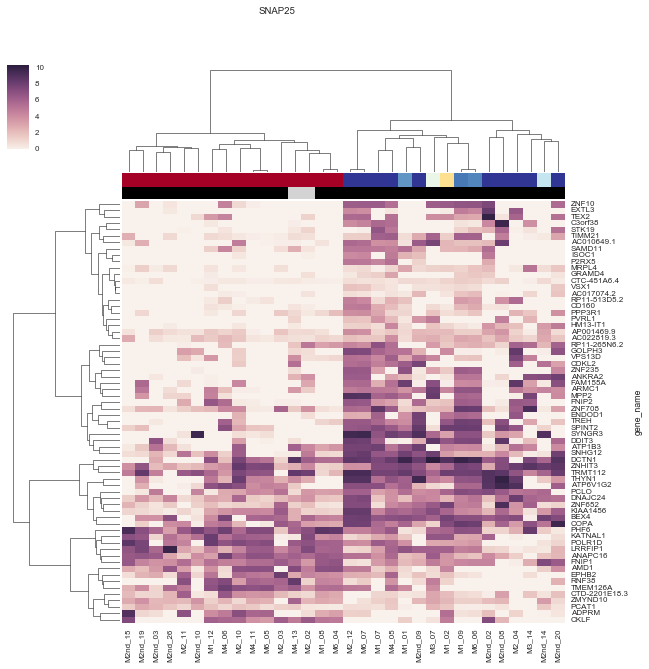

In [75]:
for splicing_gene, col in splicing_expression_corr_filtered.iteritems():
    col = col.dropna()
    splicing = splicing_to_correlate[splicing_gene].dropna()
    
    subset = motor_neurons_expression.loc[splicing.index, col.index]
    subset.columns = study.expression.feature_data.loc[subset.columns, 'gene_name']
    subset = subset.T
    print(subset.shape)
    
    psi_color = [cmap(float(splicing[sample_id])) for sample_id in subset.columns]
    side_colors = [psi_color, outlier_colors[subset.columns]]
    
    g = sns.clustermap(subset, col_colors=side_colors, method='ward')
    plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
    g.fig.suptitle(splicing_gene)
    g.savefig('{folder}/{splicing_gene}_correlated_genes_clustermap.pdf'.format(
            folder=folder, splicing_gene=splicing_gene))

(230, 41)
(268, 38)
(66, 32)


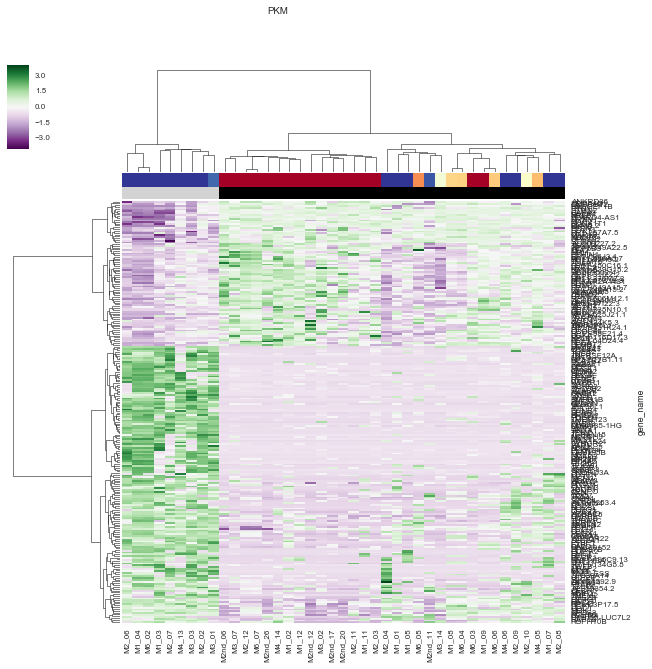

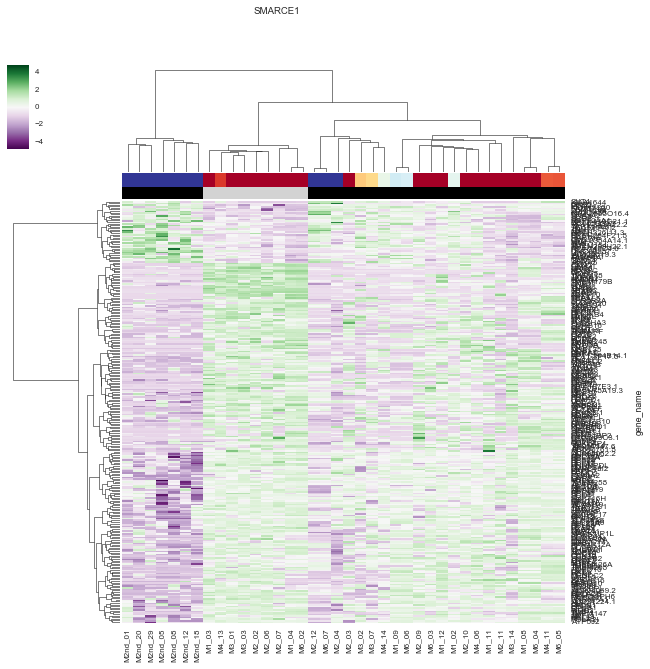

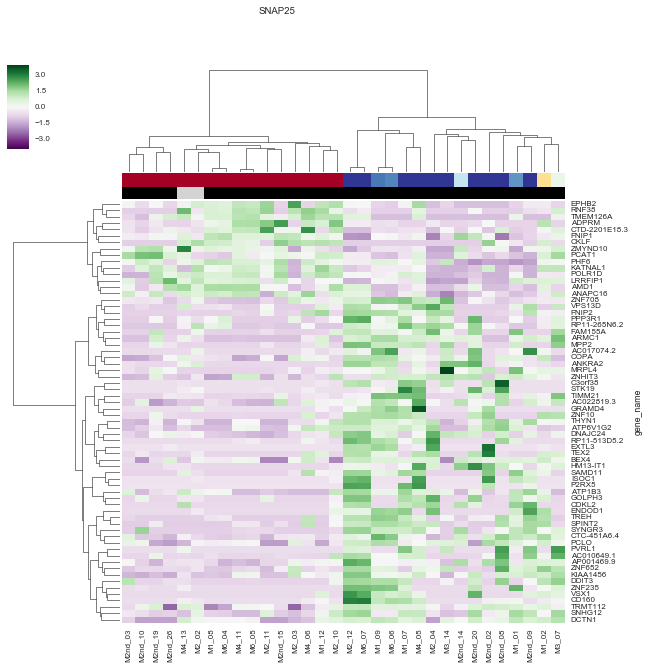

In [77]:
for splicing_gene, col in splicing_expression_corr_filtered.iteritems():
    col = col.dropna()
    splicing = splicing_to_correlate[splicing_gene].dropna()
    
    subset = motor_neurons_expression.loc[splicing.index, col.index]
    subset.columns = study.expression.feature_data.loc[subset.columns, 'gene_name']
    subset = subset.T
    print(subset.shape)
    
    psi_color = [cmap(float(splicing[sample_id])) for sample_id in subset.columns]
    side_colors = [psi_color, outlier_colors[subset.columns]]
    
    g = sns.clustermap(subset, col_colors=side_colors, method='ward', z_score=0, cmap='PRGn')
    plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
    g.fig.suptitle(splicing_gene)
    g.savefig('{folder}/{splicing_gene}_correlated_genes_clustermap_zscores.pdf'.format(
            folder=folder, splicing_gene=splicing_gene))

In [78]:
range(3)

[0, 1, 2]

In [79]:
snap25_correlated = splicing_expression_corr_filtered['SNAP25'].dropna()
snap25_correlated.head()

ENSG00000004838    0.503563
ENSG00000012232   -0.521837
ENSG00000048707   -0.548903
ENSG00000052795   -0.512067
ENSG00000066583   -0.521498
Name: SNAP25, dtype: float64

In [80]:
for x in snap25_correlated[snap25_correlated > 0].index:
    print(x)

ENSG00000004838
ENSG00000102781
ENSG00000123505
ENSG00000124831
ENSG00000133216
ENSG00000137075
ENSG00000156531
ENSG00000166295
ENSG00000170222
ENSG00000171202
ENSG00000177738
ENSG00000186184
ENSG00000217128
ENSG00000217555
ENSG00000253438


In [81]:
for x in snap25_correlated[snap25_correlated < 0].index:
    print(x)

ENSG00000012232
ENSG00000048707
ENSG00000052795
ENSG00000066583
ENSG00000069849
ENSG00000075240
ENSG00000075336
ENSG00000083454
ENSG00000100987
ENSG00000102409
ENSG00000104442
ENSG00000105364
ENSG00000108278
ENSG00000108852
ENSG00000110400
ENSG00000113384
ENSG00000117281
ENSG00000118094
ENSG00000122218
ENSG00000127561
ENSG00000136478
ENSG00000138769
ENSG00000149218
ENSG00000151500
ENSG00000159917
ENSG00000164331
ENSG00000167642
ENSG00000170946
ENSG00000173113
ENSG00000175197
ENSG00000179021
ENSG00000180081
ENSG00000182141
ENSG00000186472
ENSG00000187634
ENSG00000197989
ENSG00000198740
ENSG00000204344
ENSG00000204442
ENSG00000204843
ENSG00000213760
ENSG00000221823
ENSG00000227359
ENSG00000235313
ENSG00000239415
ENSG00000250305
ENSG00000254898
ENSG00000256223
ENSG00000259921
ENSG00000261822
ENSG00000267448


### PCA of correlated genes

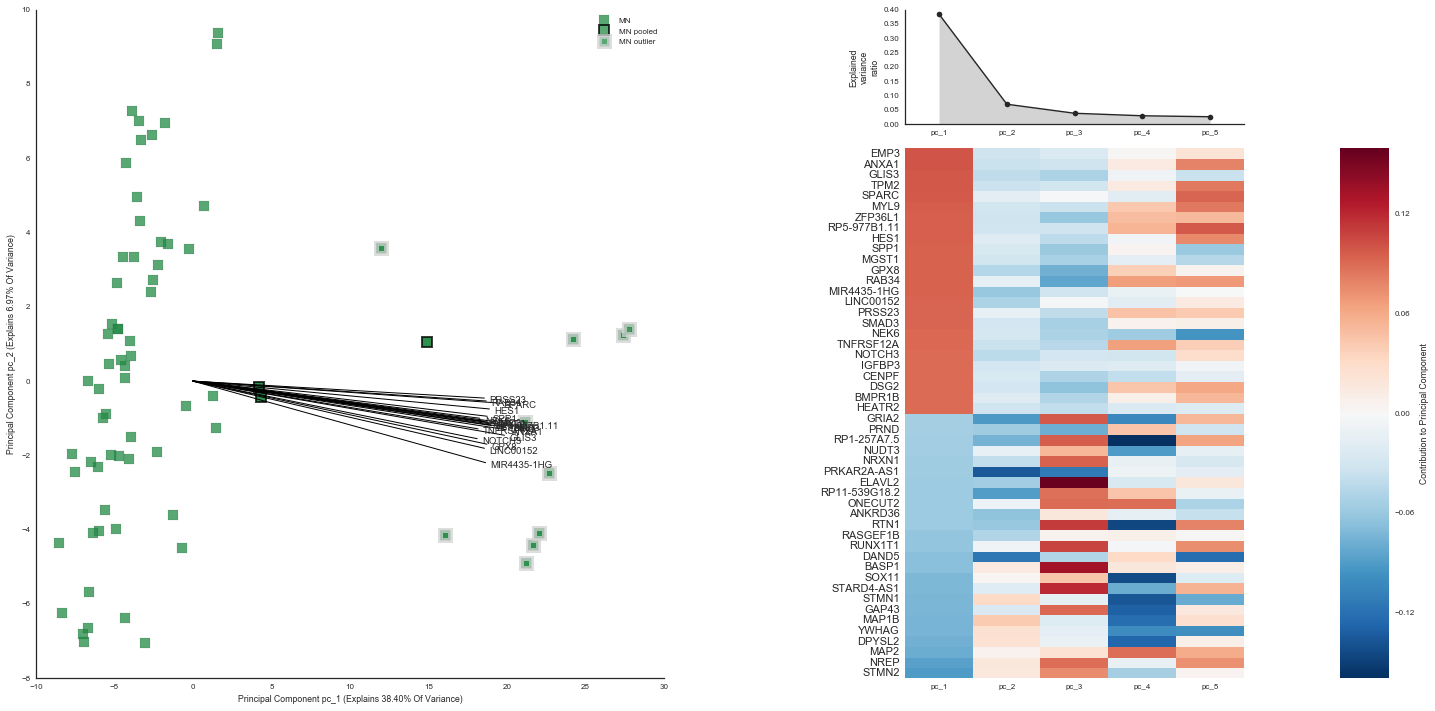

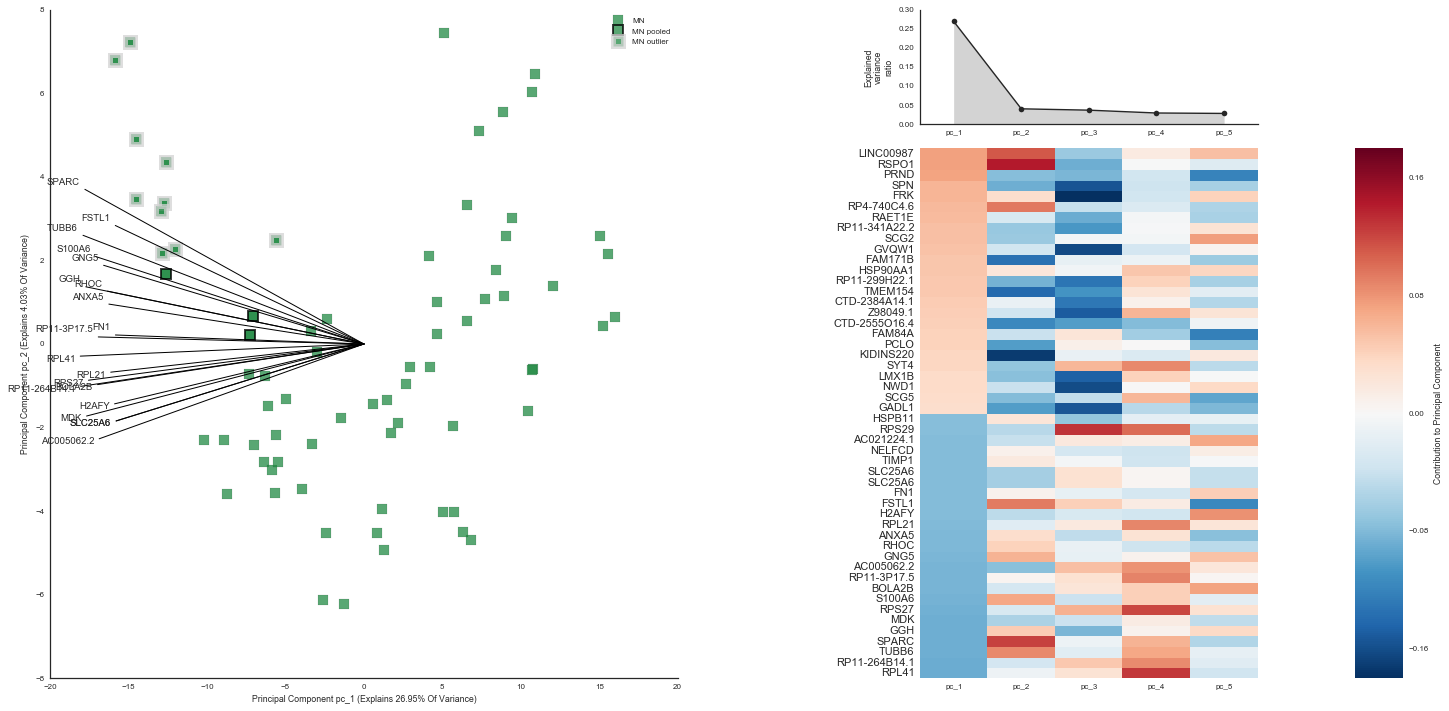

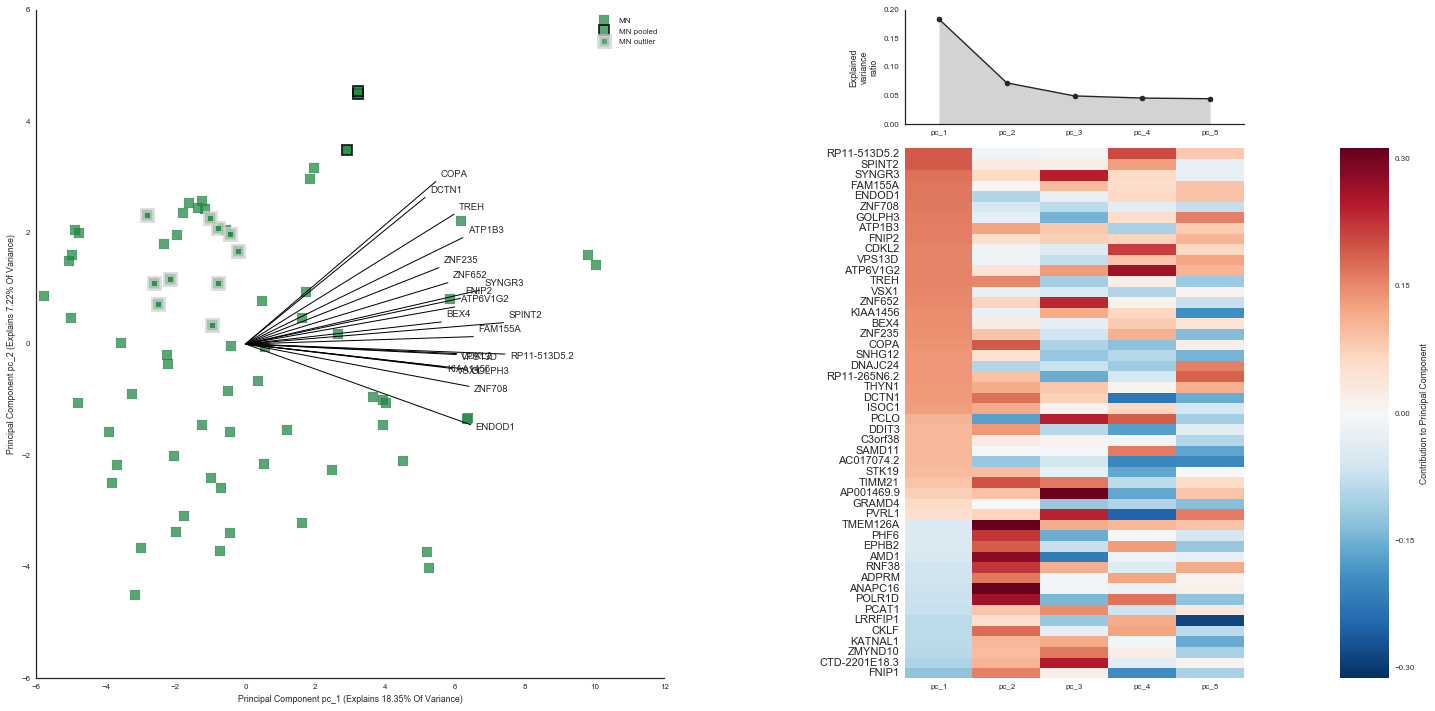

In [82]:
for splicing_gene, col in splicing_expression_corr_filtered.iteritems():
    col = col.dropna()
    splicing = splicing_to_correlate[splicing_gene].dropna()
    
    study.plot_pca(sample_subset='MN', feature_subset=col.index)
    fig = plt.gcf()
#     subset = motor_neurons_expression.loc[splicing.index, col.index]
#     subset.columns = study.expression.feature_data.loc[subset.columns, 'gene_name']
#     subset = subset.T
#     print(subset.shape)
    
#     psi_color = [cmap(float(splicing[sample_id])) for sample_id in subset.columns]
#     side_colors = [psi_color, outlier_colors[subset.columns]]
    
#     g = sns.clustermap(subset, col_colors=side_colors, method='ward')
#     plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
#     g.fig.suptitle(splicing_gene)
    fig.savefig('{folder}/{splicing_gene}_correlated_genes_pca_all_mn.pdf'.format(
            folder=folder, splicing_gene=splicing_gene))

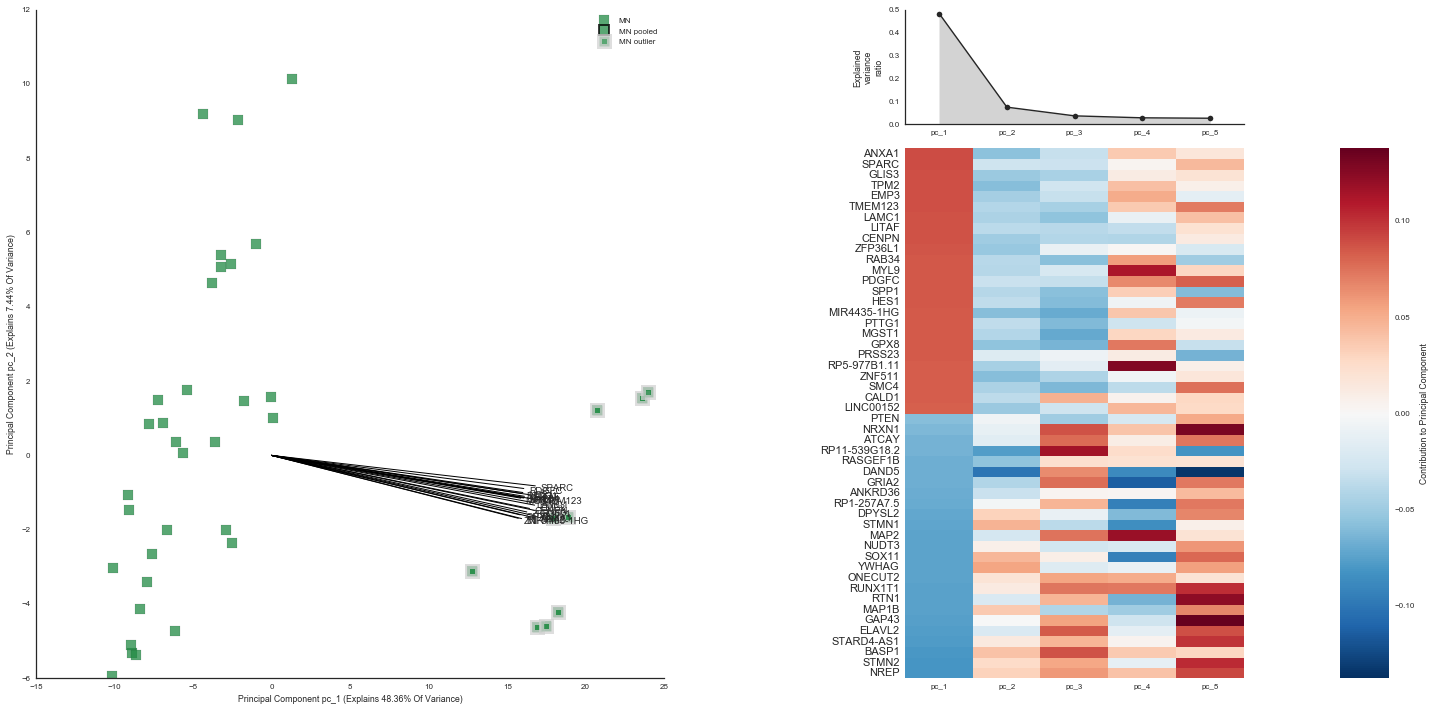

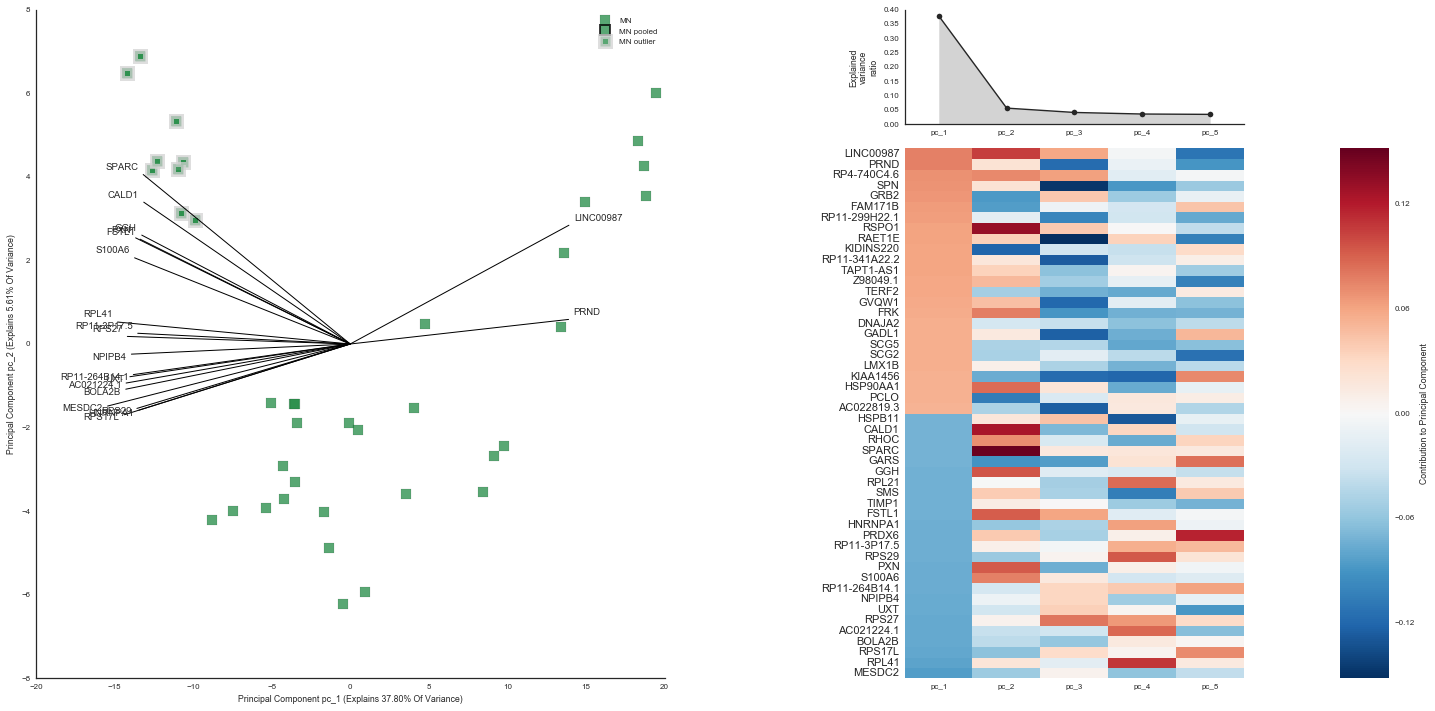

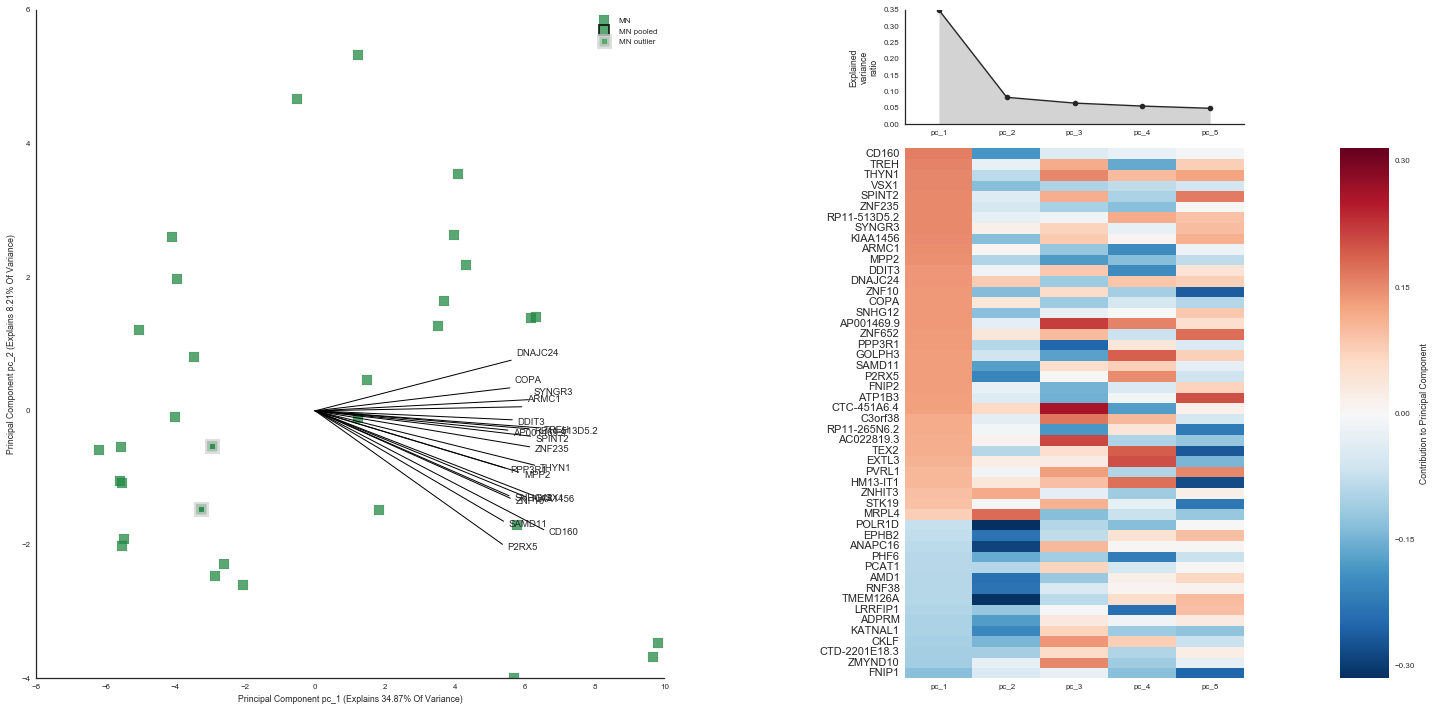

In [83]:
for splicing_gene, col in splicing_expression_corr_filtered.iteritems():
    col = col.dropna()
    splicing = splicing_to_correlate[splicing_gene].dropna()
    
    study.plot_pca(sample_subset=splicing.index, feature_subset=col.index)
    fig = plt.gcf()
#     subset = motor_neurons_expression.loc[splicing.index, col.index]
#     subset.columns = study.expression.feature_data.loc[subset.columns, 'gene_name']
#     subset = subset.T
#     print(subset.shape)
    
#     psi_color = [cmap(float(splicing[sample_id])) for sample_id in subset.columns]
#     side_colors = [psi_color, outlier_colors[subset.columns]]
    
#     g = sns.clustermap(subset, col_colors=side_colors, method='ward')
#     plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
#     g.fig.suptitle(splicing_gene)
    fig.savefig('{folder}/{splicing_gene}_correlated_genes_pca_only_with_detected_splicing.pdf'.format(
            folder=folder, splicing_gene=splicing_gene))

## Spearman correlation

In [ ]:
%time splicing_expression_spearman = splicing_to_correlate.apply(lambda x: motor_neurons_expression.apply(lambda y: y.corr(x, method='spearman')))
print(splicing_expression_spearman.shape)
splicing_expression_spearman.head()

In [ ]:
fig, ax = plt.subplots(figsize=(3, 2))
sns.violinplot(splicing_expression_spearman)
xmin, xmax = ax.get_xlim()
ax.hlines([-0.5,  0.5], xmin, xmax, linestyle='--', color='darkgrey')

## Splicing-Splicing correlation

### Pearson correlation

In [84]:
motor_neurons_splicing = study.splicing.data.loc[motor_neurons_expression.index]
print(motor_neurons_splicing.shape)
motor_neurons_splicing.head()

(70, 16360)


,exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,exon:chr10:100193697-100193848:-@exon:chr10:100190888-100191048:-@exon:chr10:100190328-100190427:-,exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193697-100193848:-,exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+,exon:chr10:101507014-101507147:+@exon:chr10:101514286-101514391:+@exon:chr10:101515382-101515465:+,exon:chr10:101964263-101964414:-@exon:chr10:101961845-101961906:-@exon:chr10:101960428-101960537:-,exon:chr10:101969352-101969546:-@exon:chr10:101966987-101967089:-@exon:chr10:101964833-101964956:-,exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-,...,exon:chrY:21903204-21903374:-@exon:chrY:21901414-21901548:-@exon:chrY:21897507-21897636:-,exon:chrY:21903621-21903743:-@exon:chrY:21903204-21903374:-@exon:chrY:21901414-21901548:-,exon:chrY:22744476-22744579:+@exon:chrY:22746360-22746410:+@exon:chrY:22749910-22749991:+,exon:chrY:2709527-2709668:+@exon:chrY:2710206-2710283:+@exon:chrY:2712118-2712298:+,exon:chrY:2710206-2710283:+@exon:chrY:2712118-2712298:+@exon:chrY:2713687-2713784:+,exon:chrY:2712118-2712298:+@exon:chrY:2713687-2713784:+@exon:chrY:2722641-2722812:+,exon:chrY:2713687-2713784:+@exon:chrY:2722641-2722812:+@exon:chrY:2733129-2733286:+,exon:chrY:2722641-2722812:+@exon:chrY:2733129-2733286:+@exon:chrY:2734834-2734903:+,exon:chrY:2821950-2822038:+@exon:chrY:2829115-2829687:+@exon:chrY:2843136-2843285:+,exon:chrY:2843552-2843695:+@exon:chrY:2844711-2844863:+@exon:chrY:2845981-2846121:+
M1_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,1,1,1,1,1,NaN,NaN
M1_02,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,1,1,1,1,NaN,NaN
M1_03,NaN,NaN,NaN,NaN,NaN,0,1,NaN,NaN,NaN,...,0,NaN,1,1,1,1,1,1,NaN,NaN
M1_04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,1,1,1,1,NaN,NaN
M1_05,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
range(3)

In [85]:
var = motor_neurons_splicing.var()
var.mean()

0.058444583595056353

In [87]:
motor_neurons_splicing = motor_neurons_splicing.loc[:, var > var.mean()]
print(motor_neurons_splicing.shape)
motor_neurons_splicing.head()

(70, 4078)


,exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+,exon:chr10:102003455-102003534:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-,exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102013178-102013296:-,exon:chr10:102703783-102703885:+@exon:chr10:102705087-102705263:+@exon:chr10:102706796-102706893:+,exon:chr10:102709833-102709964:+@exon:chr10:102710433-102710510:+@exon:chr10:102716208-102716294:+,exon:chr10:102746847-102746953:-@exon:chr10:102746506-102746732:-@exon:chr10:102743512-102743574:-,exon:chr10:102747070-102747240:-@exon:chr10:102746847-102746953:-@exon:chr10:102746506-102746732:-,exon:chr10:103113864-103113985:+@exon:chr10:103190102-103190209:+@exon:chr10:103221738-103221815:+,exon:chr10:103557737-103557911:-@exon:chr10:103553670-103553755:-@exon:chr10:103552596-103552700:-,...,exon:chrX:83757350-83757399:-@exon:chrX:83743032-83743140:-@exon:chrX:83730259-83730405:-,exon:chrX:84500909-84501028:+@exon:chrX:84501936-84502189:+@exon:chrX:84502553-84502657:+,exon:chrX:84520124-84520261:+@exon:chrX:84522284-84522421:+@exon:chrX:84523300-84523347:+,exon:chrX:85282495-85282561:-@exon:chrX:85236741-85236813:-@exon:chrX:85233771-85233895:-,exon:chrY:14813160-14813984:+@exon:chrY:14820567-14820626:+@exon:chrY:14821321-14821476:+,exon:chrY:14870436-14870572:+@exon:chrY:14872414-14872547:+@exon:chrY:14883002-14883089:+,exon:chrY:15560897-15560946:-@exon:chrY:15526615-15526673:-@exon:chrY:15522873-15522993:-,exon:chrY:16634632-16634821:+@exon:chrY:16733889-16734471:+@exon:chrY:16831339-16831398:+,exon:chrY:16734061-16734471:+@exon:chrY:16831339-16831398:+@exon:chrY:16834997-16835149:+,exon:chrY:21903204-21903374:-@exon:chrY:21901414-21901548:-@exon:chrY:21897507-21897636:-
M1_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M1_02,1,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,1,...,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
M1_03,0,NaN,NaN,NaN,1,0,NaN,1.00000,0,NaN,...,0,0,NaN,1,NaN,NaN,NaN,NaN,NaN,0
M1_04,NaN,NaN,1,NaN,NaN,NaN,NaN,0.94429,NaN,NaN,...,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN
M1_05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
%time splicing_expression_corr = splicing_to_correlate.apply(lambda x: motor_neurons_splicing.apply(lambda y: y.corr(x)))
print(splicing_expression_corr.shape)
splicing_expression_corr.head()

CPU times: user 10.4 s, sys: 1 ms, total: 10.4 s
Wall time: 10.5 s
(4078, 3)


/home/obotvinnik/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:2487: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


,PKM,SMARCE1,SNAP25
exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+,-0.183654,0.367002,0.678346
exon:chr10:102003455-102003534:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-,NaN,0.612372,NaN
exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,-0.628246,-0.154707,NaN
exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102013178-102013296:-,1.000000,NaN,NaN
exon:chr10:102703783-102703885:+@exon:chr10:102705087-102705263:+@exon:chr10:102706796-102706893:+,NaN,NaN,NaN


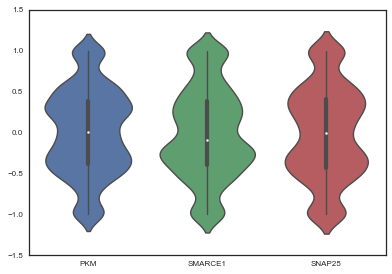

In [89]:
sns.violinplot(splicing_expression_corr)

In [90]:
splicing_expression_corr.describe()

,PKM,SMARCE1,SNAP25
count,3429.000000,2956.000000,2460.000000
mean,0.006666,-0.013649,-0.012598
std,0.520970,0.549815,0.563854
min,-1.000000,-1.000000,-1.000000
25%,-0.379991,-0.396782,-0.438973
50%,0.010524,-0.091311,-0.006675
75%,0.386583,0.379096,0.408248
max,1.000000,1.000000,1.000000


In [116]:
splicing_expression_corr_filtered = splicing_expression_corr[splicing_expression_corr.abs() > 0.5].dropna(how='all')
print(splicing_expression_corr_filtered.shape)
splicing_expression_corr_filtered.head()

(2068, 3)


,PKM,SMARCE1,SNAP25
exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+,NaN,NaN,0.678346
exon:chr10:102003455-102003534:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-,NaN,0.612372,NaN
exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,-0.628246,NaN,NaN
exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102013178-102013296:-,1.000000,NaN,NaN
exon:chr10:102746847-102746953:-@exon:chr10:102746506-102746732:-@exon:chr10:102743512-102743574:-,NaN,-1.000000,NaN


In [117]:
splicing_expression_corr_filtered.notnull().sum()

PKM        1124
SMARCE1    1071
SNAP25      919
dtype: int64

In [118]:
splicing_events

{'PKM': 'exon:chr15:72499069-72499221:-@exon:chr15:72495363-72495529:-@exon:chr15:72494795-72494961:-@exon:chr15:72492815-72492996:-',
 'SMARCE1': 'exon:chr17:38801828-38801871:-@exon:chr17:38798707-38798811:-@exon:chr17:38793744-38793824:-',
 'SNAP25': 'exon:chr20:10265372-10265420:+@exon:chr20:10273530-10273647:+@exon:chr20:10273809-10273926:+@exon:chr20:10277573-10277698:+'}

(1124, 41)
(1071, 38)
(919, 32)


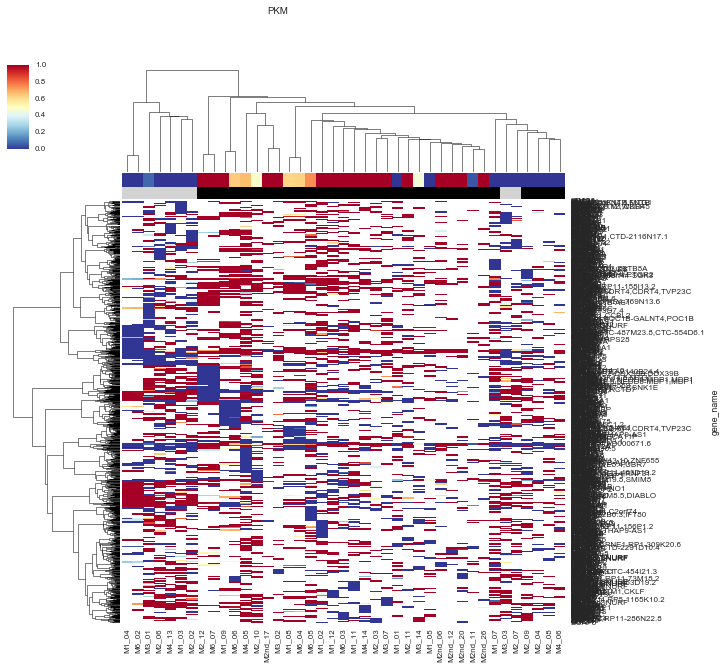

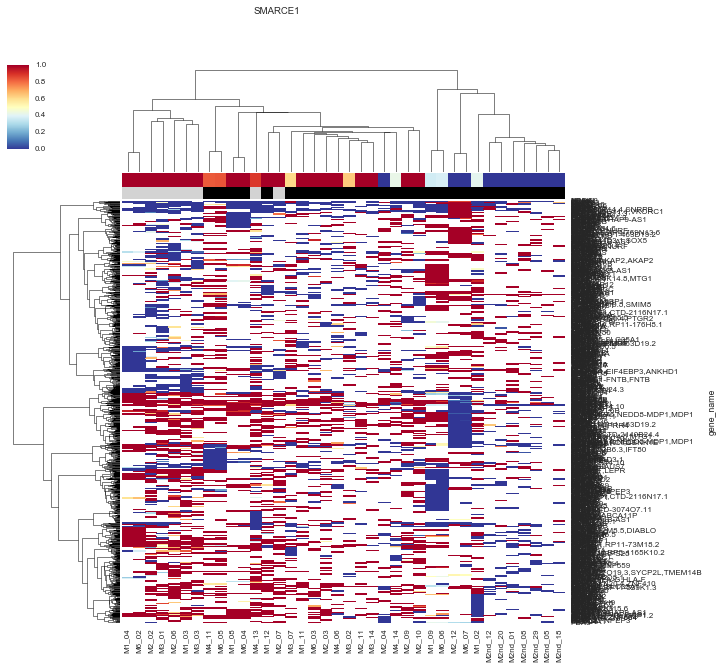

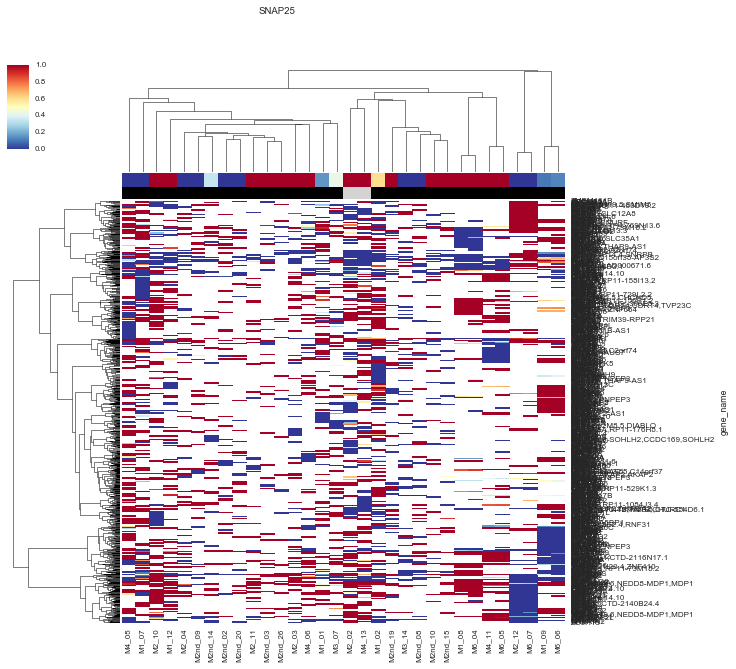

In [119]:
for splicing_gene, col in splicing_expression_corr_filtered.iteritems():
    col = col.dropna()
    splicing = splicing_to_correlate[splicing_gene].dropna()
    
    subset = motor_neurons_splicing.loc[splicing.index, col.index]
    subset.columns = study.splicing.feature_data.loc[subset.columns, 'gene_name']
    subset = subset.T
    
    # Remove the gene itself
    subset = subset.drop(splicing_events[splicing_gene])
    print(subset.shape)
    
    psi_color = [cmap(float(splicing[sample_id])) for sample_id in subset.columns]
    side_colors = [psi_color, outlier_colors[subset.columns]]
    
    g = sns.clustermap(subset.fillna(subset.mean()), mask=subset.isnull(), 
                       col_colors=side_colors, method='ward', cmap='RdYlBu_r')
    plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
    g.fig.suptitle(splicing_gene)
    g.savefig('{folder}/{splicing_gene}_correlated_events_clustermap.pdf'.format(
            folder=folder, splicing_gene=splicing_gene))

In [120]:
# pooled_mns = study.pooled & study.sample_subset_to_sample_ids('MN')

# outlier_colors[pooled_mns] = 'white'

(40, 40)
(41, 38)
(19, 32)


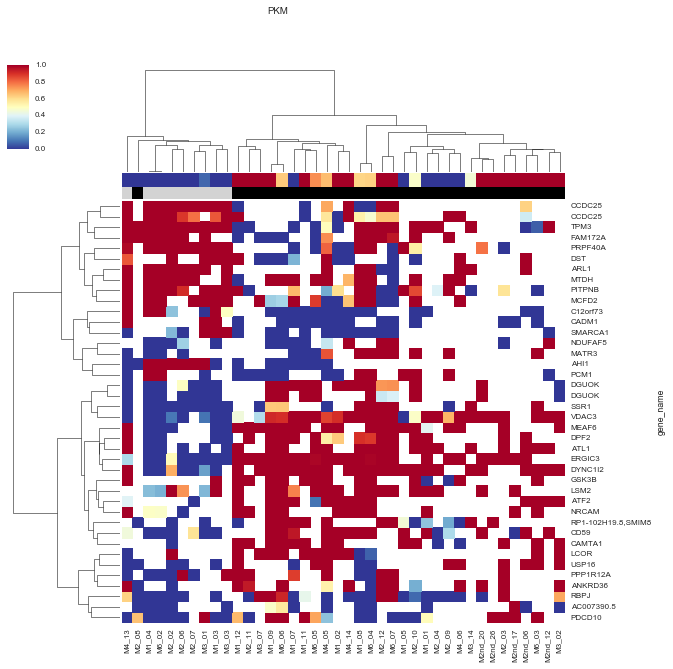

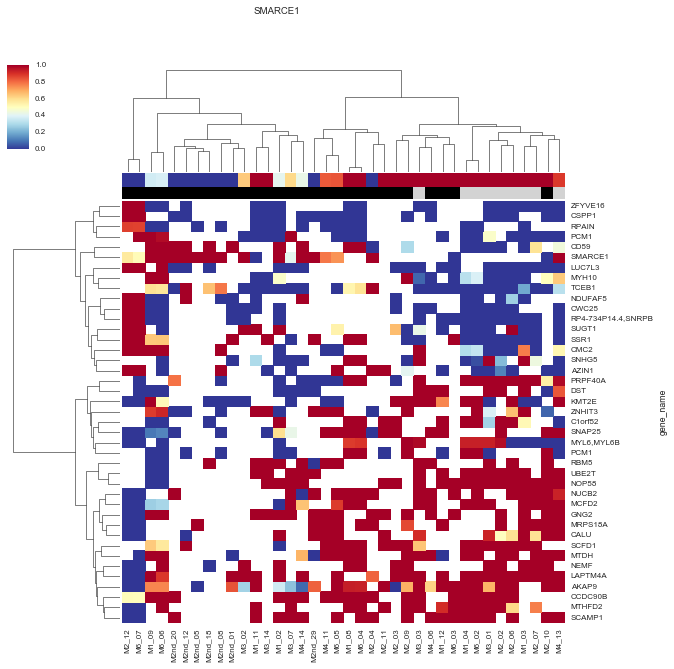

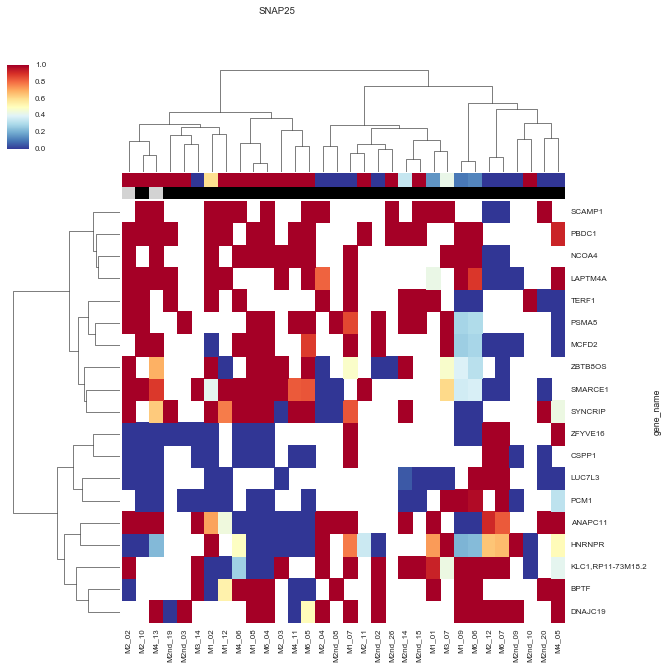

In [124]:
thresh = 15

for splicing_gene, col in splicing_expression_corr_filtered.iteritems():
    col = col.dropna()
    splicing = splicing_to_correlate[splicing_gene].dropna()
    
    subset = motor_neurons_splicing.loc[splicing.index, col.index]
    subset = subset.drop(splicing_events[splicing_gene], axis=1)
    subset.columns = study.splicing.feature_data.loc[subset.columns, 'gene_name']
    subset = subset.T.dropna(thresh=thresh, axis=0).dropna(how='all', axis=1)
    
    # Remove the gene itself
    print(subset.shape)
    
    psi_color = [cmap(float(splicing[sample_id])) for sample_id in subset.columns]
    side_colors = [psi_color, outlier_colors[subset.columns]]
    
    mask = subset.isnull()
    plot_data = subset.fillna(subset.mean())
    
    g = sns.clustermap(plot_data, mask=mask, 
                       col_colors=side_colors, method='ward', cmap='RdYlBu_r')
    plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
    g.fig.suptitle(splicing_gene)
    g.savefig('{folder}/{splicing_gene}_correlated_events_clustermap_dropna_thresh{thresh}.pdf'.format(
            folder=folder, splicing_gene=splicing_gene, thresh=thresh))